In [1]:
import sys
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from dsa_analysis import load_config, visualize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate
import main
from main import RNNLayer
import ast

%load_ext autoreload
%autoreload 2

/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(


### Load config

In [2]:
config = load_config("../config.yaml")

In [3]:
def parse_model_info(model_name):
    model_name = model_name.replace('.pth', '')
    model_name = model_name.split('_')
    model_type = model_name[0] + '_' + model_name[1]
    if len(model_name) == 8:    
        activation = model_name[2] + '_' + model_name[3]
        hidden_size = int(model_name[4])
        learning_rate = float(model_name[5])
        batch_size = int(model_name[6])
    else:
        activation = model_name[2]
        hidden_size = int(model_name[3])
        learning_rate = float(model_name[4])
        batch_size = int(model_name[5])
    return model_type, activation, hidden_size, learning_rate, batch_size

parse_model_info('leaky_gru_leaky_relu_128_0.001_128_train.pth')



('leaky_gru', 'leaky_relu', 128, 0.001, 128)

In [4]:
def get_dynamics_model(rnn_type, activation, hidden_size, lr, model, group,device, n_components=3):
    # Load configuration and set hyperparameters
    config = load_config("../config.yaml")
    ruleset = config["rules_analysis"][-1]
    all_rules = config["rules_analysis"]

    hp = {
        "rnn_type": rnn_type,
        "activation": activation,
        "n_rnn": hidden_size,
        "learning_rate": lr,
        "l2_h": 0.00001,
        "l2_weight": 0.00001,
        "mode": "test",
    }
    hp, _, _ = main.set_hyperparameters(
        model_dir="debug", hp=hp, ruleset=all_rules, rule_trains=ruleset
    )
    run_model = main.load_model(
        f"../models/{group}/{model}",
        hp,
        RNNLayer,
        device=device,
    )
    h = main.representation(run_model, all_rules)
    h_trans, explained_variance = main.compute_pca(h, n_components=n_components)
    tensor_on_cpu = h_trans[("AntiPerceptualDecisionMakingDelayResponseT", "stimulus")].cpu()
    return tensor_on_cpu.detach().numpy(), explained_variance

### Get dynamics to plot

In [5]:
model = "leaky_rnn_softplus_256_0.001_128_train.pth"

#### Pretrain unfrozen

In [6]:
group = "pretrain_unfrozen"
model_type, activation, hidden_size, lr, batch_size = parse_model_info(model)
curve, explained_variance = get_dynamics_model(
    model_type, activation, hidden_size, lr, model, group, "cpu", n_components=3 
)

/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(
/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(
/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(
/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.

#### Visualize the curves

/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


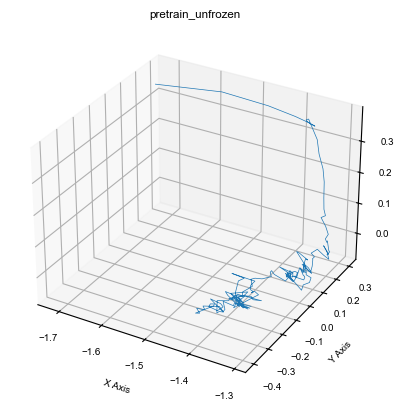

In [7]:
visualize([curve[:,100,:]],title=group)

#### Pretrain frozen

In [8]:
group = "pretrain_frozen"
model_type, activation, hidden_size, lr, batch_size = parse_model_info(model)
curve, explained_variance = get_dynamics_model(
    model_type, activation, hidden_size, lr, model, group, "cpu", n_components=3 
)

/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(
/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(
/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(
/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.

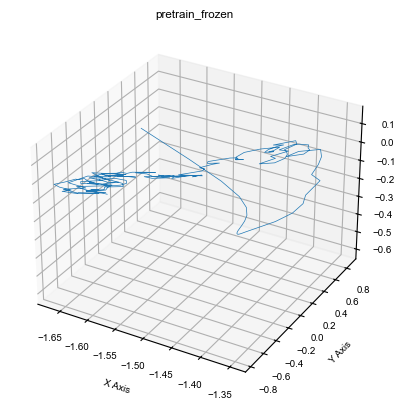

In [9]:
visualize([curve[:,100,:]],title=group)

#### master

In [10]:
group = "master"
model_type, activation, hidden_size, lr, batch_size = parse_model_info(model)
curve, explained_variance = get_dynamics_model(
    model_type, activation, hidden_size, lr, model, group, "cpu", n_components=3 
)

/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(
/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(
/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(
/Users/qguilhot/Library/Caches/pypoetry/virtualenvs/multitask-rnn-kKi2hSus-py3.11/lib/python3.11/site-packages/gym/envs/registration.py:396: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.

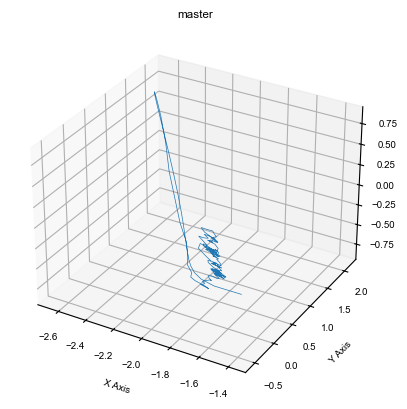

In [11]:
visualize([curve[:,100,:]],title=group)

### Get dissimilarities

#### Computation dynamics

In [18]:
# load data
path = "../data/dissimilarities"
files = os.listdir(path)
data = []
for file in files:
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(path, file))
        data.append(df)
data = pd.concat(data)

# Create a new DataFrame with swapped values
df_swapped = data.rename(columns={"model1": "model2", "model2": "model1", "group1": "group2", "group2": "group1"})

# Concatenate the original DataFrame with the swapped DataFrame
data = pd.concat([data, df_swapped], ignore_index=True)

data_groupes_mean_dissimilarity = data.groupby(['group1', 'group2'])[["cka","procrustes","dsa"]].median().reset_index()
data_models = data[data['model1'] == data['model2']].groupby(['group1', 'group2','model1','model2'])[["cka","procrustes","dsa"]].median().reset_index()
data_models_averaged = data_models.groupby(['group1', 'group2'])[["cka","procrustes","dsa"]].median().reset_index()

##### Dissimilarities Many to Many models

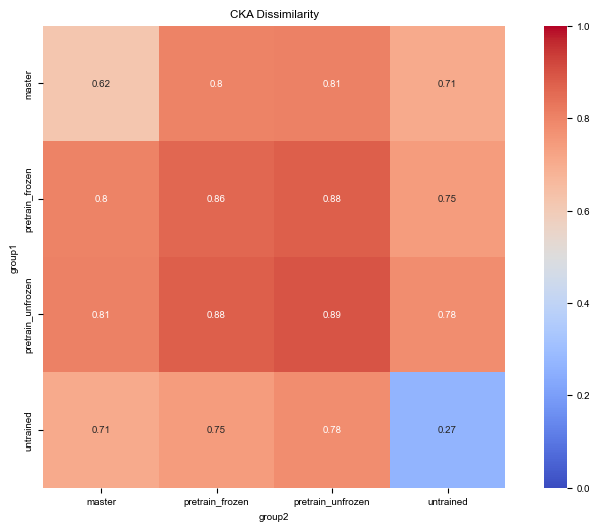

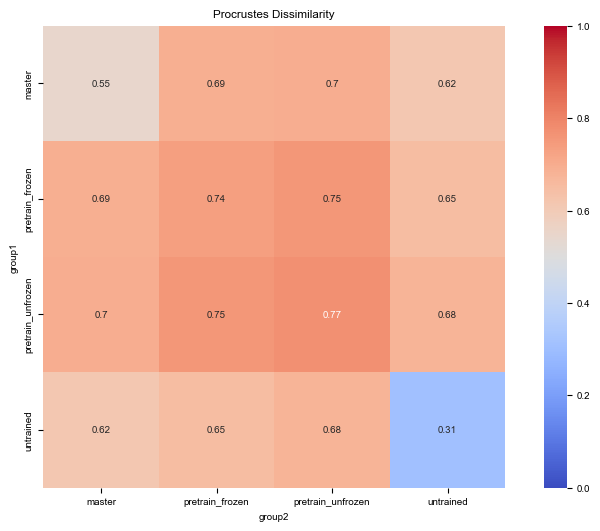

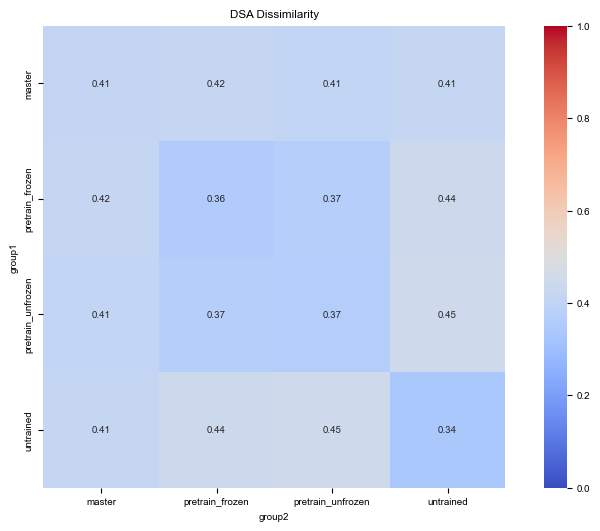

In [19]:
# plot heatmap of the dissimilarity between the groups
df = pd.DataFrame(data_groupes_mean_dissimilarity)

# Pivot the dataframe to prepare for heatmap
pivot_df = df.pivot(index='group1', columns='group2', values=['cka', 'procrustes', 'dsa'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df['cka'], annot=True, cmap='coolwarm', cbar=True, vmin=0, vmax=1, square=True)
plt.title('CKA Dissimilarity')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df['procrustes'], annot=True, cmap='coolwarm', cbar=True, vmin=0, vmax=1, square=True)
plt.title('Procrustes Dissimilarity')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df['dsa'], annot=True, cmap='coolwarm', cbar=True, vmin=0, vmax=1, square=True)
plt.title('DSA Dissimilarity')
plt.show()

##### Dissimilarities One to One models

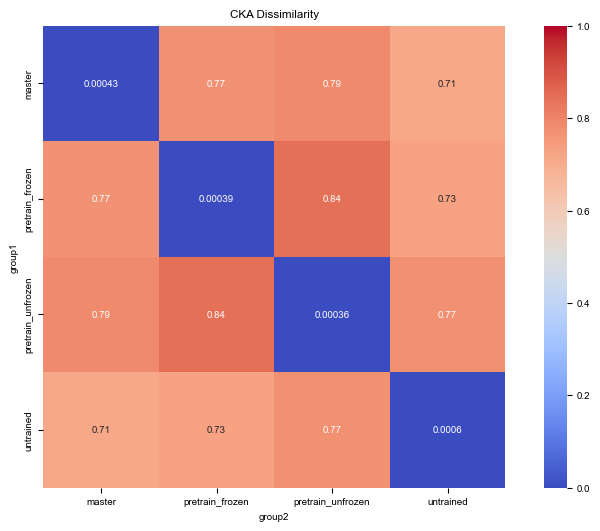

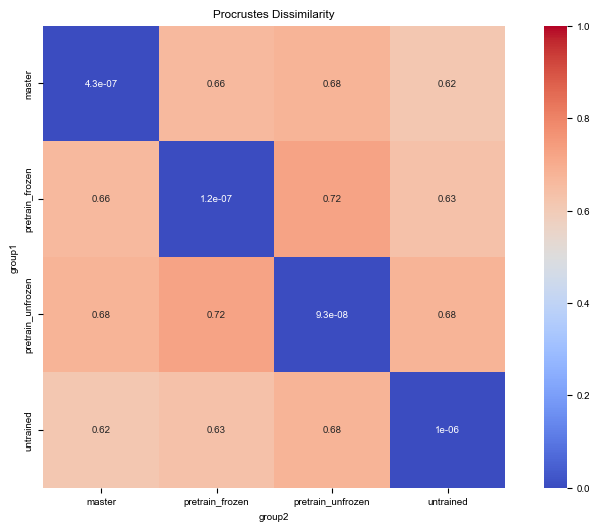

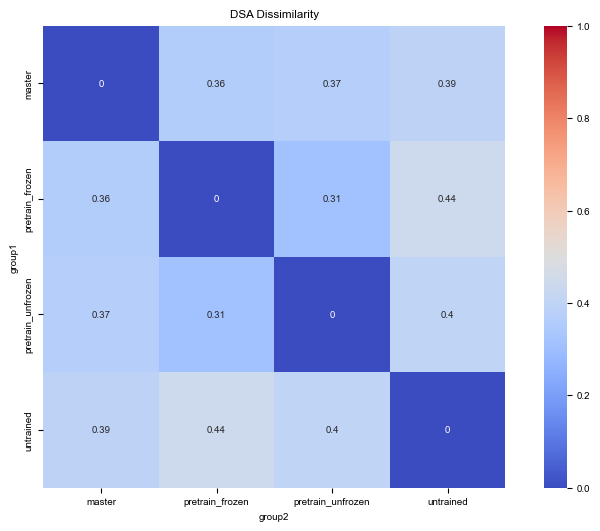

In [20]:
# plot heatmap of the dissimilarity between the groups
df = pd.DataFrame(data_models_averaged)

# Pivot the dataframe to prepare for heatmap
pivot_df = df.pivot(index='group1', columns='group2', values=['cka', 'procrustes', 'dsa'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df['cka'], annot=True, cmap='coolwarm', cbar=True, vmin=0, vmax=1, square=True)
plt.title('CKA Dissimilarity')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df['procrustes'], annot=True, cmap='coolwarm', cbar=True, vmin=0, vmax=1, square=True)
plt.title('Procrustes Dissimilarity')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df['dsa'], annot=True, cmap='coolwarm', cbar=True, vmin=0, vmax=1, square=True)
plt.title('DSA Dissimilarity')
plt.show()

#### Learning dynamics

For now, only analysis for pretrain_frozen against pretrain_unfrozen

In [114]:
path = "../data/dissimilarities_over_learning"
files = os.listdir(path)
data = []
for file in files:
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(path, file))
        data.append(df)
df = pd.concat(data)
df['cka'] = df['cka'].apply(ast.literal_eval)
df['procrustes'] = df['procrustes'].apply(ast.literal_eval)
df['dsa'] = df['dsa'].apply(ast.literal_eval)
# Create a new DataFrame with swapped values
df_swapped = df.rename(columns={"group1": "group2", "group2": "group1"})

# Concatenate the original DataFrame with the swapped DataFrame
df = pd.concat([df, df_swapped], ignore_index=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.8132926165090718, 0.804532075647832, 0.806973345488146, 0.8293629266615441, 0.8034759565500296, 0.8180926926494275, 0.8099176156922154, 0.8012567108116418, 0.8159520994359927, 0.8210078889124901, 0.8209112975058724, 0.8107949541364675, 0.8168124950239215, 0.8203009940960334, 0.8143906677313892, 0.8142871041486112, 0.8036963692316426]
[0.0, 5.88235294117647, 11.76470588235294, 17.647058823529413, 23.52941176470588, 29.411764705882355, 35.294117647058826, 41.17647058823529, 47.05882352941176, 52.94117647058824, 58.82352941176471, 64.70588235294117, 70.58823529411765, 76.47058823529412, 82.35294117647058, 88.23529411764706, 94.11764705882352]


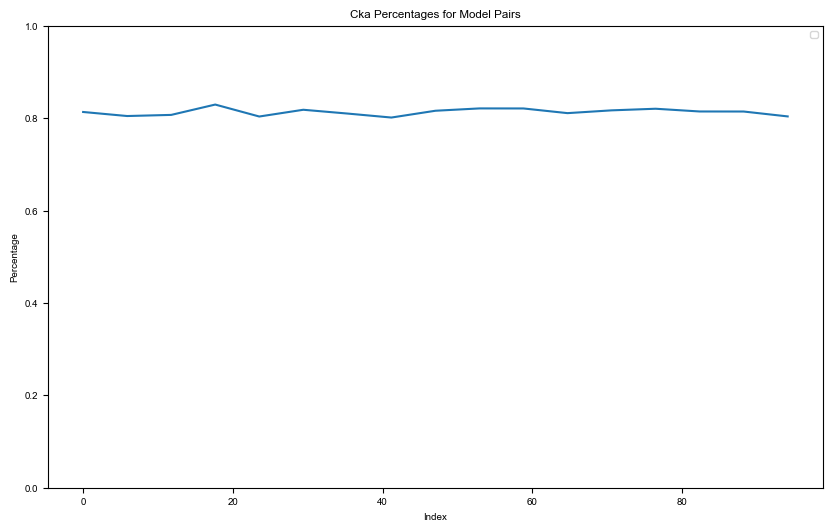

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.7090301865111027, 0.699208725553603, 0.6974005553753896, 0.7125564038769369, 0.6918778958409808, 0.7057960607714937, 0.6860846749435107, 0.6996485149023909, 0.7043710664217769, 0.7069925360538707, 0.715240232192936, 0.7041076725997314, 0.7018335831436416, 0.713220035974257, 0.6937222598247954, 0.7073535710615027, 0.7006416442329704]
[0.0, 5.88235294117647, 11.76470588235294, 17.647058823529413, 23.52941176470588, 29.411764705882355, 35.294117647058826, 41.17647058823529, 47.05882352941176, 52.94117647058824, 58.82352941176471, 64.70588235294117, 70.58823529411765, 76.47058823529412, 82.35294117647058, 88.23529411764706, 94.11764705882352]


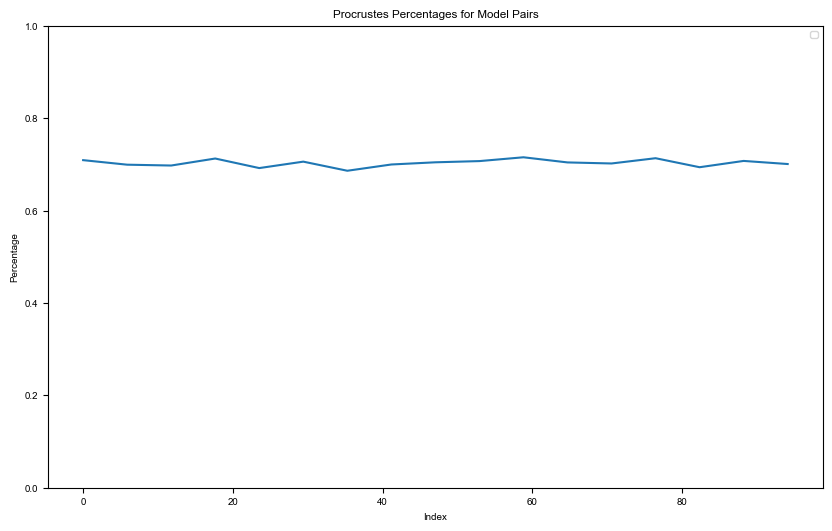

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.3284929394721985, 0.3411642611026764, 0.3542592525482178, 0.29509207606315613, 0.33936023712158203, 0.3297736346721649, 0.32781270146369934, 0.36817920207977295, 0.35046812891960144, 0.3202955722808838, 0.3295383155345917, 0.3443487584590912, 0.3429564833641052, 0.3466864228248596, 0.3447987139225006, 0.3673751652240753, 0.32112637162208557]
[0.0, 5.88235294117647, 11.76470588235294, 17.647058823529413, 23.52941176470588, 29.411764705882355, 35.294117647058826, 41.17647058823529, 47.05882352941176, 52.94117647058824, 58.82352941176471, 64.70588235294117, 70.58823529411765, 76.47058823529412, 82.35294117647058, 88.23529411764706, 94.11764705882352]


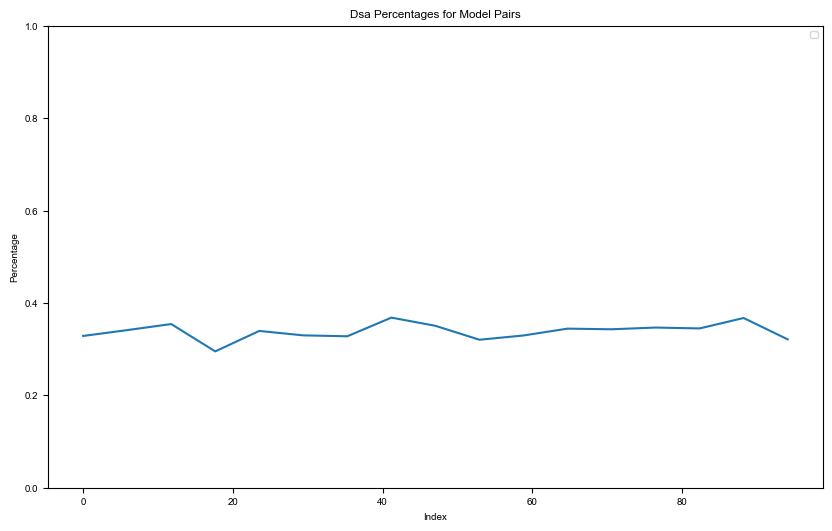

In [115]:
# Fix group1 and group2
group1_fixed = "pretrain_frozen"
group2_fixed = "pretrain_unfrozen"
rnn_type = "leaky_rnn"
activation = "leaky_relu"
hidden_size = 128
learning_rate = 0.001
batch_size = 256

df_filtered = df[(df['group1'] == group1_fixed) & (df['group2'] == group2_fixed) & (df['rnn_type'] == rnn_type) & (df['activation'] == activation) & (df['hidden_size'] == hidden_size) & (df['lr'] == learning_rate) & (df['batch_size'] == batch_size)]

# Plotting
def plot_measure(measure):
    plt.figure(figsize=(10, 6))
    
    for index, row in df_filtered.iterrows():
        values = row[measure]
        print(values)
        percentages = [(index / len(values)) * 100 for index in range(len(values))]
        print(percentages)
        plt.plot(percentages, values)
    
    plt.title(f'{measure.capitalize()} Percentages for Model Pairs')
    plt.xlabel('Index')
    plt.ylabel('Percentage')
    plt.ylim(0, 1) 
    plt.legend()
    plt.show()

# Plotting for cka, procrustes, and dsa
plot_measure('cka')
plot_measure('procrustes')
plot_measure('dsa')

In [116]:
# Fix group1 and group2
group1_fixed = "pretrain_unfrozen"
group2_fixed = "pretrain_frozen"
# Define the percentages
percentages = [i for i in range(0, 101, 20)]

df_group1_group2 = df[(df['group1'] == group1_fixed) & (df['group2'] == group2_fixed)]

In [117]:
df_group1_group2 = df_group1_group2[df_group1_group2['dsa'].apply(len).between(5, 6)]

In [118]:
df_group1_group2

,group1,group2,rnn_type,activation,hidden_size,lr,batch_size,cka,procrustes,dsa
199,pretrain_unfrozen,pretrain_frozen,leaky_rnn,leaky_relu,256,0.001,256,"[0.8134565625588539, 0.8254126052854034, 0.816...","[0.7256880685982906, 0.7343839022877944, 0.730...","[0.3317404091358185, 0.3759783208370209, 0.403..."
230,pretrain_unfrozen,pretrain_frozen,leaky_gru,leaky_relu,256,0.001,128,"[0.7074246336658281, 0.6925981762422486, 0.721...","[0.6375672300850175, 0.6141992035259766, 0.653...","[0.30154791474342346, 0.21866294741630554, 0.2..."
239,pretrain_unfrozen,pretrain_frozen,leaky_gru,relu,256,0.001,256,"[0.6949400610769569, 0.7041678695549036, 0.708...","[0.6632673072688926, 0.670095078254239, 0.6652...","[0.2718777656555176, 0.2284979522228241, 0.216..."
242,pretrain_unfrozen,pretrain_frozen,leaky_gru,softplus,128,0.001,128,"[0.8126308071973303, 0.7867870422704586, 0.804...","[0.7048366034462895, 0.6833389485526943, 0.699...","[0.24960628151893616, 0.23842622339725494, 0.2..."


In [119]:
# Filter out empty lists in 'dsa'
filtered_dsa = df_group1_group2['dsa'].apply(lambda x: len(x) if x else None).dropna()

# Calculate statistics
filtered_dsa.describe()

count    4.00
mean     5.25
std      0.50
min      5.00
25%      5.00
50%      5.00
75%      5.25
max      6.00
Name: dsa, dtype: float64

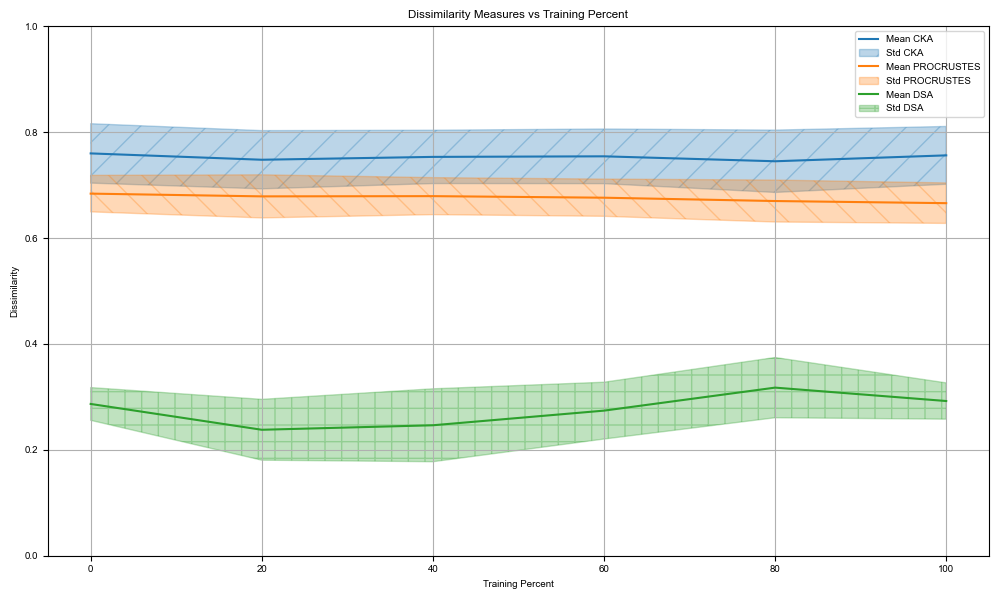

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Function to interpolate and sample at fixed percentages
def interpolate_and_sample(measures_list, percentages):
    if not measures_list:
        return [np.nan] * len(percentages)
    
    original_percentages = np.linspace(0, 100, len(measures_list))
    interpolation_function = interp1d(original_percentages, measures_list, kind='linear', fill_value="extrapolate")
    return interpolation_function(percentages)

# Apply interpolation and sampling to each row
for measure in ['cka', 'procrustes', 'dsa']:
    df_group1_group2[measure + '_interpolated'] = df_group1_group2[measure].apply(lambda x: interpolate_and_sample(x, percentages))

# Calculate the mean and standard deviation for each measure
summary_stats = {}
for measure in ['cka', 'procrustes', 'dsa']:
    interpolated_values = np.array(df_group1_group2[measure + '_interpolated'].tolist())
    summary_stats[measure] = {
        'median': np.nanmedian(interpolated_values, axis=0),
        'std': np.nanstd(interpolated_values, axis=0)
    }

# Plotting
plt.figure(figsize=(10, 6))

# Plot each measure with different colors and hatching patterns for uncertainty
for i, measure in enumerate(['cka', 'procrustes', 'dsa']):
    median = summary_stats[measure]['median']
    std = summary_stats[measure]['std']
    color = f"C{i}"  # Cycle through different colors
    hatch = "/" if i == 0 else "\\" if i == 1 else "+"  # Different hatching patterns
    
    plt.plot(percentages, median, color=color, label=f"Mean {measure.upper()}")
    plt.fill_between(percentages, median - std, median + std, color=color, alpha=0.3, hatch=hatch, label=f"Std {measure.upper()}")

plt.title('Dissimilarity Measures vs Training Percent')
plt.xlabel('Training Percent')
plt.ylabel('Dissimilarity')
plt.ylim(0, 1)  # Set y-axis range between 0 and 1
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
